In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';')

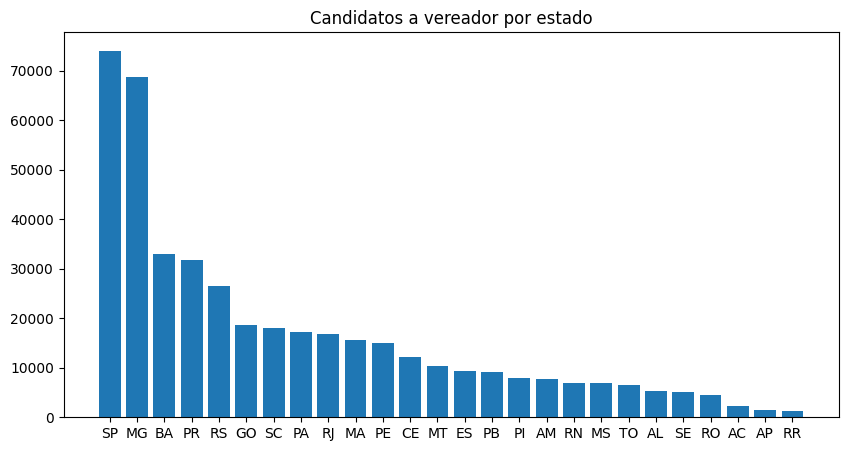

In [13]:
df_candidatos_vereador_by_uf = df[df["DS_CARGO"]== "VEREADOR"][["SG_UF", "NM_URNA_CANDIDATO"]].\
                                groupby(["SG_UF"]).count().\
                                sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_vereador_by_uf.index, df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a vereador por estado")
plt.show()

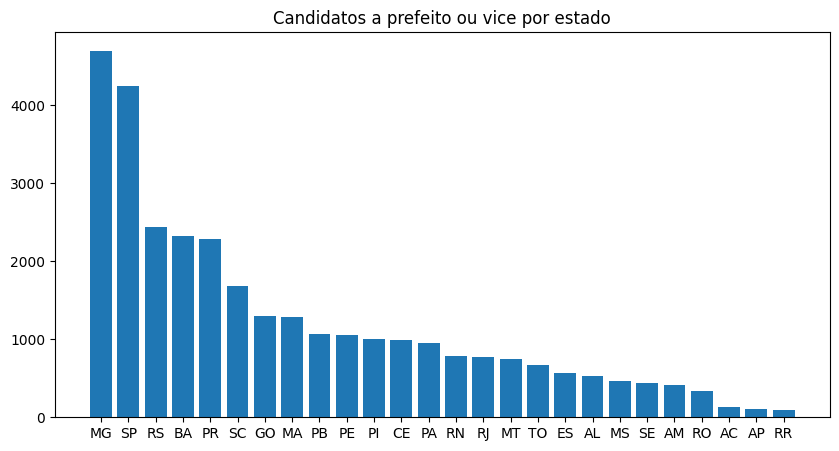

In [14]:
df_candidatos_prefeitura_by_uf = df[df["DS_CARGO"] != "VEREADOR"][["SG_UF", "NM_URNA_CANDIDATO"]]\
                                .groupby(["SG_UF"]).count()\
                                .sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_prefeitura_by_uf.index, df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a prefeito ou vice por estado")
plt.show()

In [5]:
populcacao_por_estados = pd.read_csv("população_estados.csv", sep=";") # Nomes de arquivos não deveriam ter ã ç 
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.merge(populcacao_por_estados, on="SG_UF")

   SG_UF  NM_URNA_CANDIDATO  POPULACAO
0     SP              74043   44411238
1     MG              68741   20538718
2     BA              32879   14141626
3     PR              31718   11444380
4     RS              26576   10882965
5     GO              18668    7056495
6     SC              17933    7610361
7     PA              17135    8121025
8     RJ              16812   16054524
9     MA              15543    6775805
10    PE              15002    9058931
11    CE              12223    8794957
12    MT              10358    3658649
13    ES               9291    3833712
14    PB               9163    3974687
15    PI               7977    3271199
16    AM               7691    3941613
17    RN               6901    3302729
18    MS               6897    2757013
19    TO               6527    1511460
20    AL               5310    3127683
21    SE               5148    2209558
22    RO               4532    1581196
23    AC               2183     830018
24    AP               14

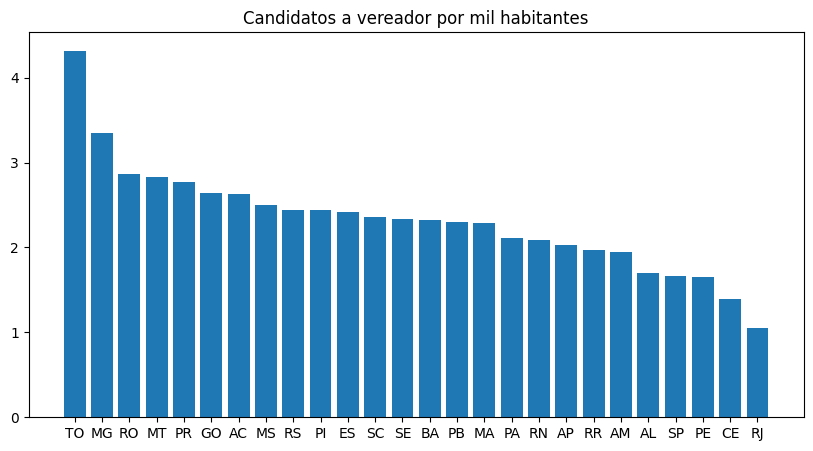

In [6]:
print(df_candidatos_vereador_by_uf)
df_candidatos_vereador_by_uf["CAND_POR_MIL_HAB"] = df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"]/(df_candidatos_vereador_by_uf["POPULACAO"]/1000)
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.sort_values(by="CAND_POR_MIL_HAB", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_vereador_by_uf["SG_UF"], df_candidatos_vereador_by_uf["CAND_POR_MIL_HAB"])
plt.title("Candidatos a vereador por mil habitantes")
plt.show()

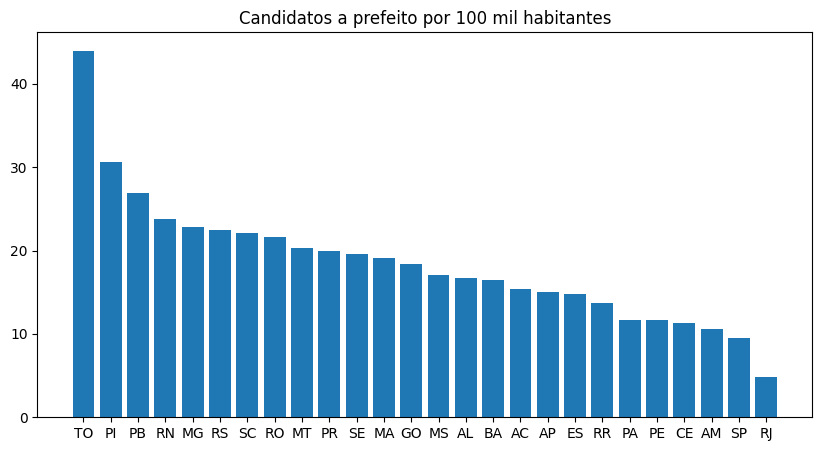

In [7]:
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.merge(populcacao_por_estados, on="SG_UF")
df_candidatos_prefeitura_by_uf["CAND_POR_100MIL_HAB"] = df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"]/(df_candidatos_prefeitura_by_uf["POPULACAO"]/100000)
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="CAND_POR_100MIL_HAB", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_prefeitura_by_uf["SG_UF"], df_candidatos_prefeitura_by_uf["CAND_POR_100MIL_HAB"])
plt.title("Candidatos a prefeito por 100 mil habitantes")
plt.show()

In [8]:
df_pop_grandes_cidades = pd.read_csv("populacao_grandes_cidades.csv", sep=";")
df_pop_grandes_cidades["CIDADE"] = df_pop_grandes_cidades["CIDADE"].apply(lambda x : x.upper())
df_pop_grandes_cidades

,CIDADE,POPULACAO
0,SÃO PAULO,11451999
1,RIO DE JANEIRO,6211223
2,BRASÍLIA,2817381
3,FORTALEZA,2428708
4,SALVADOR,2417678
...,...,...
314,MANACAPURU,101883
315,BALSAS,101767
316,LAGARTO,101579
317,ASSIS,101409


In [9]:
lista_de_cidades = list(df_pop_grandes_cidades["CIDADE"])
df_cand_vereador_grandes_cidades = df_candidatos_vereador[df_candidatos_vereador["NM_UE"].isin(lista_de_cidades)]\
[["NM_UE", "NM_URNA_CANDIDATO"]].groupby(["NM_UE"]).count()
df_cand_vereador_grandes_cidades = df_pop_grandes_cidades.merge(df_cand_vereador_grandes_cidades, left_on="CIDADE", right_on="NM_UE")
df_cand_vereador_grandes_cidades["CAND_POR_MIL_HAB"] = df_cand_vereador_grandes_cidades["NM_URNA_CANDIDATO"]/(df_cand_vereador_grandes_cidades["POPULACAO"]/1000)
df_cand_vereador_grandes_cidades = df_cand_vereador_grandes_cidades.sort_values(by="CAND_POR_MIL_HAB", ascending=False)
df_cand_vereador_grandes_cidades

,CIDADE,POPULACAO,NM_URNA_CANDIDATO,CAND_POR_MIL_HAB
264,SÃO GONÇALO DO AMARANTE,115838,347,2.995563
199,SANTA RITA,149910,433,2.888400
312,ITUIUTABA,102217,292,2.856668
283,PAULÍNIA,110537,313,2.831631
263,FORMOSA,115901,323,2.786861
...,...,...,...,...
7,RECIFE,1488920,519,0.348575
14,MACEIÓ,957916,314,0.327795
2,FORTALEZA,2428708,771,0.317453
1,RIO DE JANEIRO,6211223,1028,0.165507


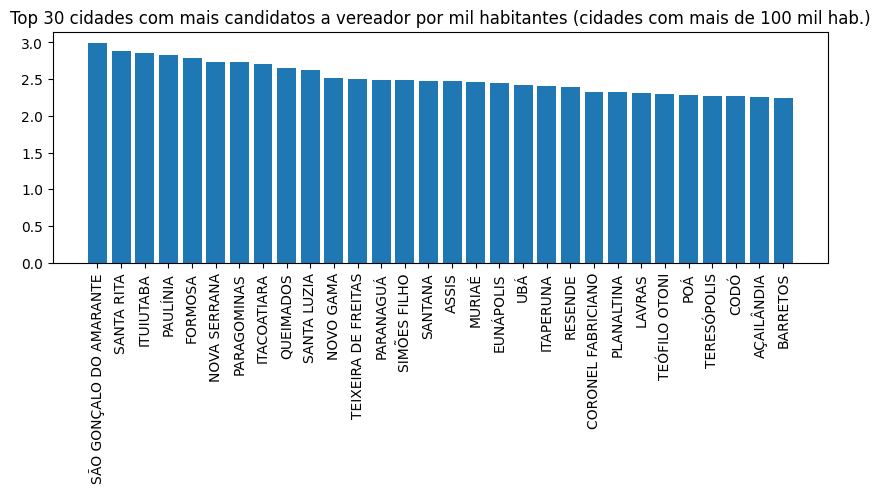

In [10]:
plt.figure(figsize=(10, 3))
plt.bar(df_cand_vereador_grandes_cidades.iloc[0:30]["CIDADE"], df_cand_vereador_grandes_cidades.iloc[0:30]["CAND_POR_MIL_HAB"])
plt.title("Top 30 cidades com mais candidatos a vereador por mil habitantes (cidades com mais de 100 mil hab.)")
plt.xticks(rotation=90)
plt.show()

Cidades com menos de um candidato a vereador para cada 2 mil habitantes são representados em vermelho no gráfico abaixo.

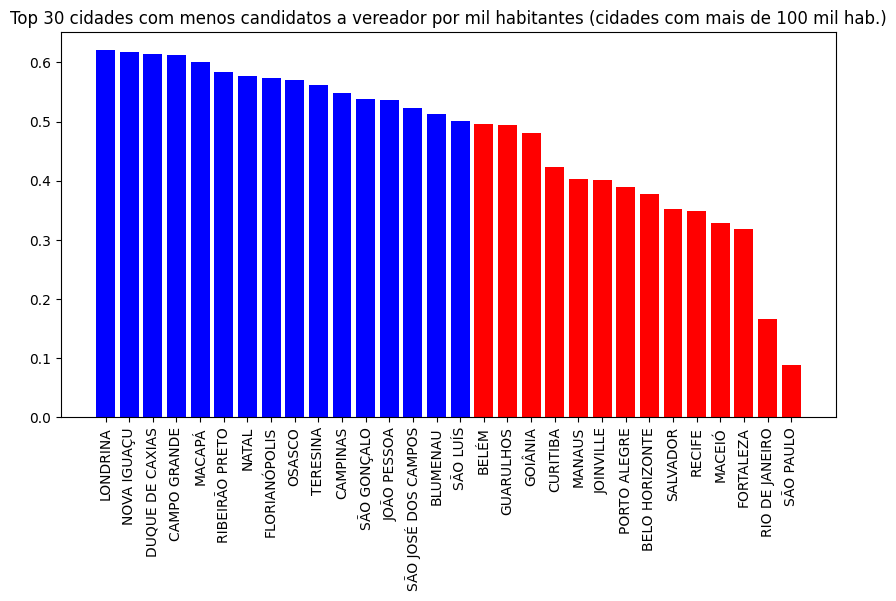

In [11]:
bar_colors = ["red" if x[1]["CAND_POR_MIL_HAB"] < 0.5 else "blue" for x in df_cand_vereador_grandes_cidades[-30:].iterrows()]
plt.figure(figsize=(10, 5))
plt.bar(df_cand_vereador_grandes_cidades.iloc[-30:]["CIDADE"], df_cand_vereador_grandes_cidades.iloc[-30:]["CAND_POR_MIL_HAB"], color=bar_colors)
plt.title("Top 30 cidades com menos candidatos a vereador por mil habitantes (cidades com mais de 100 mil hab.)")
plt.xticks(rotation=90)
plt.show()

In [12]:
df_cand_prefeito_vice_grandes_cidades = df_candidatos_prefeito_vice[df_candidatos_prefeito_vice["NM_UE"].isin(lista_de_cidades)]\
[["NM_UE", "NM_URNA_CANDIDATO"]].groupby(["NM_UE"]).count()
df_cand_prefeito_vice_grandes_cidades = df_pop_grandes_cidades.merge(df_cand_prefeito_vice_grandes_cidades, left_on="CIDADE", right_on="NM_UE")
df_cand_prefeito_vice_grandes_cidades["CAND_POR_100MIL_HAB"] = df_cand_prefeito_vice_grandes_cidades["NM_URNA_CANDIDATO"]/(df_cand_vereador_grandes_cidades["POPULACAO"]/100000)
df_cand_prefeito_vice_grandes_cidades = df_cand_prefeito_vice_grandes_cidades.sort_values(by="CAND_POR_100MIL_HAB", ascending=False)
df_cand_prefeito_vice_grandes_cidades

,CIDADE,POPULACAO,NM_URNA_CANDIDATO,CAND_POR_100MIL_HAB
283,PAULÍNIA,110537,18,16.284140
196,ARAUCÁRIA,151666,21,13.846215
262,ITAGUAÍ,116841,16,13.693823
306,ITACOATIARA,103598,14,13.513774
255,SARANDI,118455,16,13.507239
...,...,...,...,...
2,FORTALEZA,2428708,18,0.741135
5,MANAUS,2063689,14,0.678397
3,SALVADOR,2417678,14,0.579068
1,RIO DE JANEIRO,6211223,18,0.289798


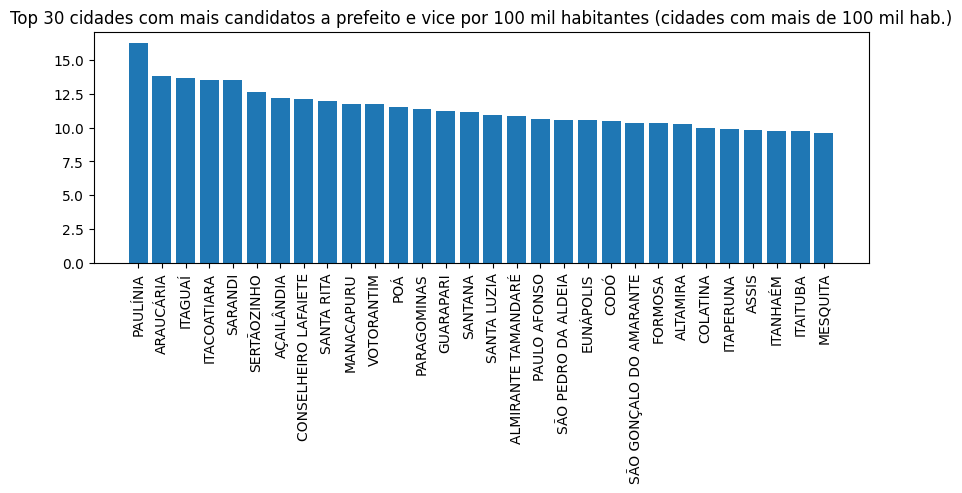

In [13]:
plt.figure(figsize=(10, 3))
plt.bar(df_cand_prefeito_vice_grandes_cidades.iloc[0:30]["CIDADE"], df_cand_prefeito_vice_grandes_cidades.iloc[0:30]["CAND_POR_100MIL_HAB"])
plt.title("Top 30 cidades com mais candidatos a prefeito e vice por 100 mil habitantes (cidades com mais de 100 mil hab.)")
plt.xticks(rotation=90)
plt.show()

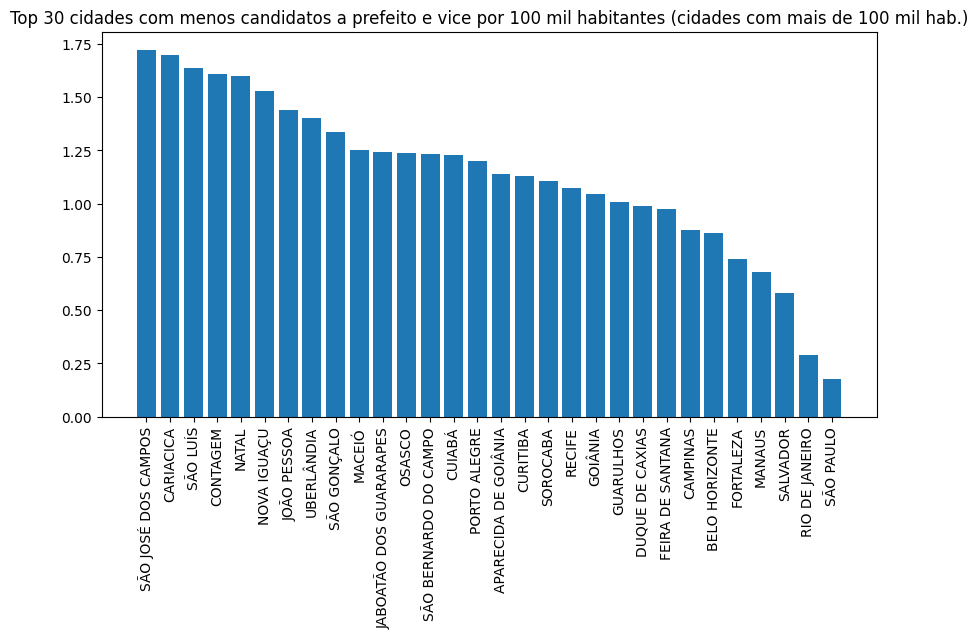

In [63]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_prefeito_vice_grandes_cidades.iloc[-30:]["CIDADE"], df_cand_prefeito_vice_grandes_cidades.iloc[-30:]["CAND_POR_100MIL_HAB"])
plt.title("Top 30 cidades com menos candidatos a prefeito e vice por 100 mil habitantes (cidades com mais de 100 mil hab.)")
plt.xticks(rotation=90)
plt.show()

In [64]:
print(df.columns)

Index(['SG_UF', 'NM_UE', 'DS_CARGO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO',
       'NM_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO'],
      dtype='object')


In [82]:
df_candidatos_por_partido = df[["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()
df_candidatos_por_partido = df_candidatos_por_partido.sort_values(by="NM_URNA_CANDIDATO", ascending = False)
display(df_candidatos_por_partido)

,SG_PARTIDO,NM_URNA_CANDIDATO
4,MDB,44481
14,PP,39907
18,PSD,38927
27,UNIÃO,36603
11,PL,36034
25,REPUBLICANOS,34026
22,PT,30133
17,PSB,26554
13,PODE,23805
10,PDT,22933


In [83]:
candidatos_partidos_pequenos = pd.DataFrame(df_candidatos_por_partido[df_candidatos_por_partido["NM_URNA_CANDIDATO"] < 1000].sum())
display(candidatos_partidos_pequenos.T)

,SG_PARTIDO,NM_URNA_CANDIDATO
0,PCOPSTUUPPCB,486


,SG_PARTIDO,NM_URNA_CANDIDATO
4,MDB,44481
14,PP,39907
18,PSD,38927
27,UNIÃO,36603
11,PL,36034
25,REPUBLICANOS,34026
22,PT,30133
17,PSB,26554
13,PODE,23805
10,PDT,22933


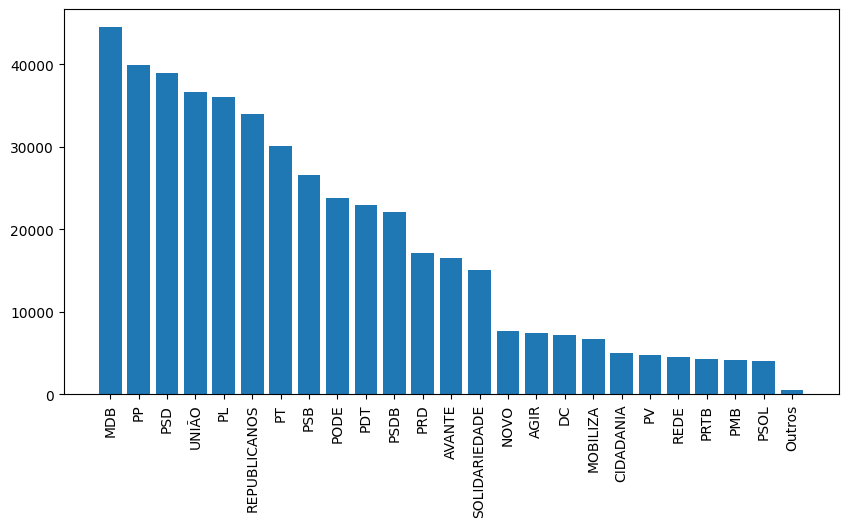

In [84]:
df_candidatos_por_partido = df_candidatos_por_partido[df_candidatos_por_partido["NM_URNA_CANDIDATO"]>= 1000]
row =  ["Outros",candidatos_partidos_pequenos.T.iloc[0]["NM_URNA_CANDIDATO"]]
df_candidatos_por_partido.loc[df_candidatos_por_partido.index[-1]] = row
display(df_candidatos_por_partido)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(df_candidatos_por_partido["SG_PARTIDO"], df_candidatos_por_partido["NM_URNA_CANDIDATO"])
plt.show()

In [85]:
df_cand_por_partido_e_cargo = df[df["DS_CARGO"] == "VEREADOR"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.rename(columns={"NM_URNA_CANDIDATO": "VEREADOR"}).rename(columns={"NM_URNA_CANDIDATO": "VEREADOR"})
df_candidatos_prefeito_por_partido = df[df["DS_CARGO"] == "PREFEITO"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()
df_candidatos_vice_prefeito_por_partido = df[df["DS_CARGO"] == "VICE-PREFEITO"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()

df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.merge(df_candidatos_prefeito_por_partido, on="SG_PARTIDO")
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.rename(columns={"NM_URNA_CANDIDATO": "PREFEITO"})
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.merge(df_candidatos_vice_prefeito_por_partido, on="SG_PARTIDO")
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.rename(columns={"NM_URNA_CANDIDATO": "VICE_PREFEITO"})

df_cand_por_partido_e_cargo["VEREADOR POR PREFEITO"] = df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["PREFEITO"]
df_cand_por_partido_e_cargo["VEREADOR POR VICE_PREFEITO"] = df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["VICE_PREFEITO"]
df_cand_por_partido_e_cargo["PREFEITO POR VICE"] = df_cand_por_partido_e_cargo["PREFEITO"]/df_cand_por_partido_e_cargo["VICE_PREFEITO"]
df_cand_por_partido_e_cargo["LEGISLATIVO POR EXECUTIVO"] = df_cand_por_partido_e_cargo["VEREADOR"]\
/(df_cand_por_partido_e_cargo["PREFEITO"] +  df_cand_por_partido_e_cargo["VICE_PREFEITO"])


display(df_cand_por_partido_e_cargo)

,SG_PARTIDO,VEREADOR,PREFEITO,VICE_PREFEITO,VEREADOR POR PREFEITO,VEREADOR POR VICE_PREFEITO,PREFEITO POR VICE,LEGISLATIVO POR EXECUTIVO
0,AGIR,7127,90,157,79.188889,45.394904,0.573248,28.854251
1,AVANTE,15694,390,435,40.241026,36.078161,0.896552,19.023030
2,CIDADANIA,4802,111,123,43.261261,39.040650,0.902439,20.521368
3,DC,6908,105,159,65.790476,43.446541,0.660377,26.166667
4,MDB,40826,1926,1729,21.197300,23.612493,1.113939,11.169904
5,MOBILIZA,6298,149,179,42.268456,35.184358,0.832402,19.201220
6,NOVO,7067,247,290,28.611336,24.368966,0.851724,13.160149
7,PC do B,3020,61,105,49.508197,28.761905,0.580952,18.192771
8,PCB,17,9,10,1.888889,1.700000,0.900000,0.894737
9,PCO,93,43,43,2.162791,2.162791,1.000000,1.081395


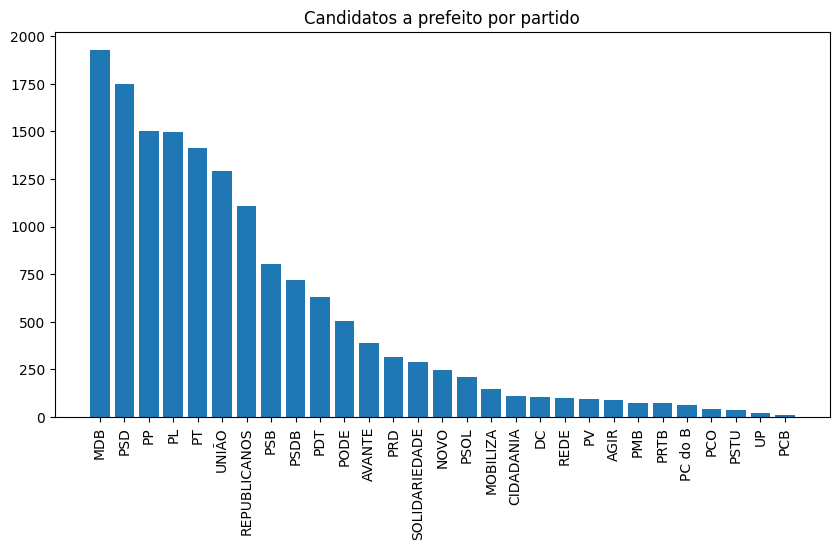

In [86]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["PREFEITO"])
plt.title("Candidatos a prefeito por partido")
plt.show()

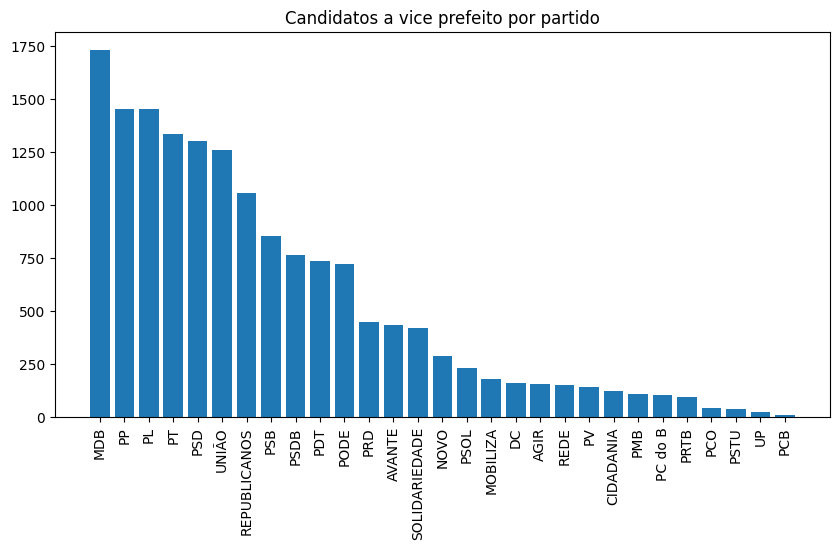

In [87]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="VICE_PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Candidatos a vice prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["VICE_PREFEITO"])
plt.show()

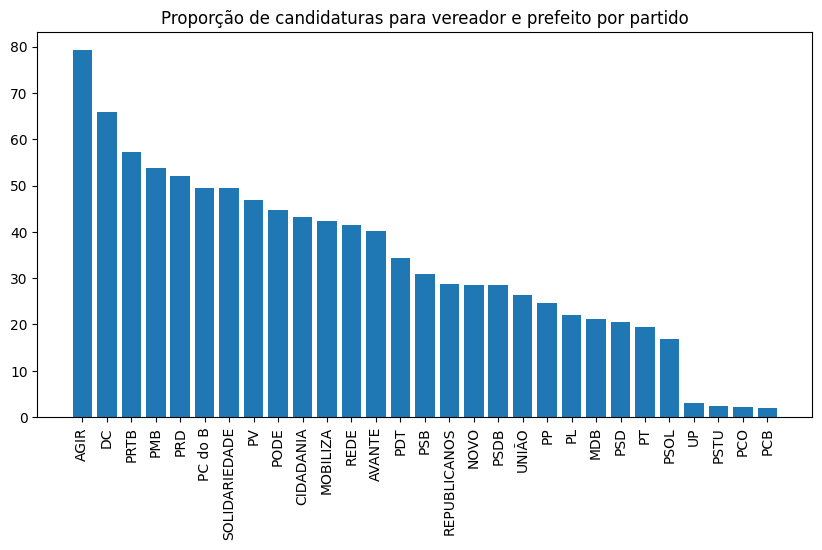

In [88]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="VEREADOR POR PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["VEREADOR POR PREFEITO"])
plt.show()

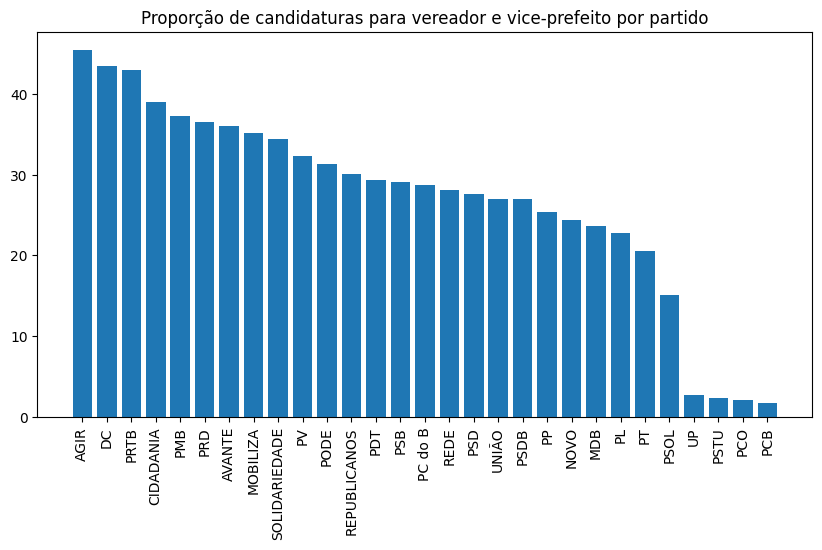

In [89]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="VEREADOR POR VICE_PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e vice-prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["VEREADOR POR VICE_PREFEITO"])
plt.show()

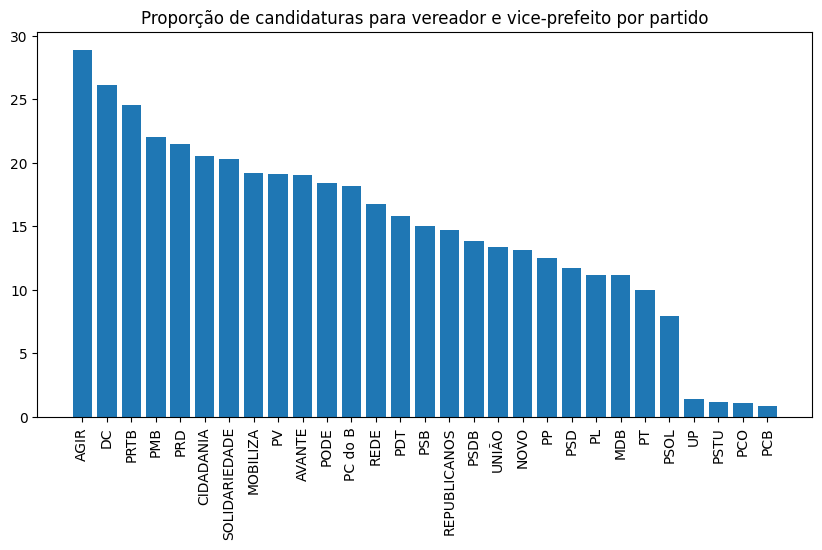

In [90]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="LEGISLATIVO POR EXECUTIVO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e vice-prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["LEGISLATIVO POR EXECUTIVO"])
plt.show()

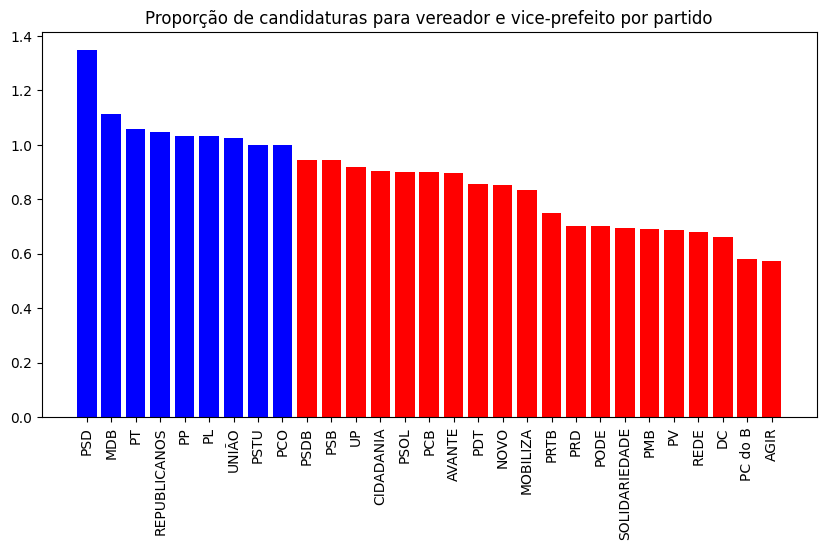

In [91]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="PREFEITO POR VICE", ascending=False)
bar_colors = ["red" if x[1]["PREFEITO POR VICE"] < 1 else "blue" for x in df_cand_por_partido_e_cargo.iterrows()]
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e vice-prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["PREFEITO POR VICE"], color=bar_colors)
plt.show()

Partidos em azul, no gráfico acima, tem mais candidatos a prefeito do que a vice

In [92]:
df_bancadas_por_partido = pd.read_csv("bancadas_camara_deputados.csv", sep=";")
df_bancadas_por_partido = df_bancadas_por_partido.sort_values(by="DEPUTADOS", ascending=False).reset_index()
display(df_bancadas_por_partido)
print(df_bancadas_por_partido["DEPUTADOS"].sum())

,index,SG_PARTIDO,DEPUTADOS
0,10,PL,92
1,11,PT,68
2,0,UNIÃO,59
3,1,PP,50
4,6,PSD,45
5,8,REPUBLICANOS,44
6,7,MDB,44
7,2,PDT,18
8,9,PODE,14
9,14,PSB,14


513


In [93]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.merge(df_bancadas_por_partido[["SG_PARTIDO", "DEPUTADOS"]],\
                                                                on="SG_PARTIDO")
display(df_cand_por_partido_e_cargo)

,SG_PARTIDO,VEREADOR,PREFEITO,VICE_PREFEITO,VEREADOR POR PREFEITO,VEREADOR POR VICE_PREFEITO,PREFEITO POR VICE,LEGISLATIVO POR EXECUTIVO,DEPUTADOS
0,PSD,35876,1751,1300,20.488864,27.596923,1.346923,11.758768,45
1,MDB,40826,1926,1729,21.197300,23.612493,1.113939,11.169904,44
2,PT,27385,1412,1336,19.394476,20.497754,1.056886,9.965429,68
3,REPUBLICANOS,31862,1107,1057,28.782294,30.143803,1.047304,14.723660,44
4,PP,36952,1501,1454,24.618254,25.414030,1.032325,12.504907,50
5,PL,33082,1499,1453,22.069380,22.768066,1.031659,11.206640,92
6,UNIÃO,34051,1292,1260,26.355263,27.024603,1.025397,13.342868,59
7,PSDB,20611,721,763,28.586685,27.013106,0.944954,13.888814,12
8,PSB,24894,806,854,30.885856,29.149883,0.943794,14.996386,14
9,CIDADANIA,4802,111,123,43.261261,39.040650,0.902439,20.521368,5


Partidos com menos de 1000 candidatos a vereador por deputado na Câmara são representados em azul no grafico abaixo.

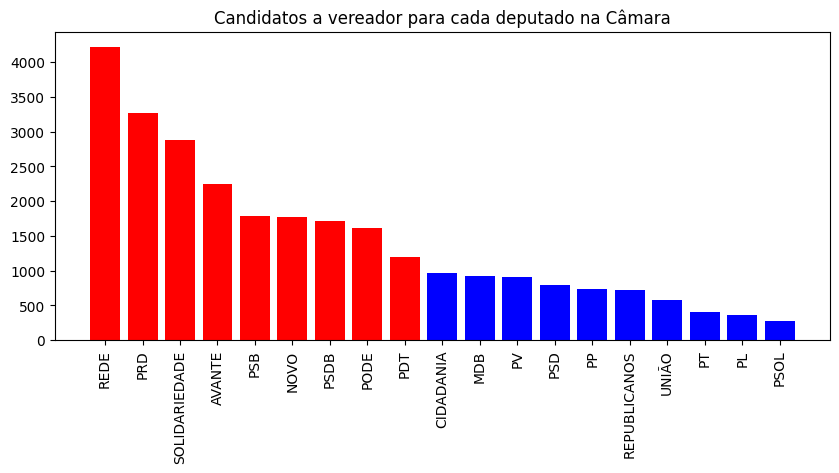

In [94]:
df_cand_por_partido_e_cargo["CAND. VEREADOR POR DEPUTADO"] = df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["DEPUTADOS"]
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="CAND. VEREADOR POR DEPUTADO", ascending=False) 
bar_colors = ["blue" if x[1]["CAND. VEREADOR POR DEPUTADO"] < 1000 else "red" for x in df_cand_por_partido_e_cargo.iterrows()]
figure = plt.figure(figsize = (10, 4))
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["CAND. VEREADOR POR DEPUTADO"], color=bar_colors)
plt.xticks(rotation=90)
plt.title("Candidatos a vereador para cada deputado na Câmara")
plt.show()

Partidos com menos de 30 candidatos a prefeito por deputado n Câmara são representados em azul no gráfico abaixo

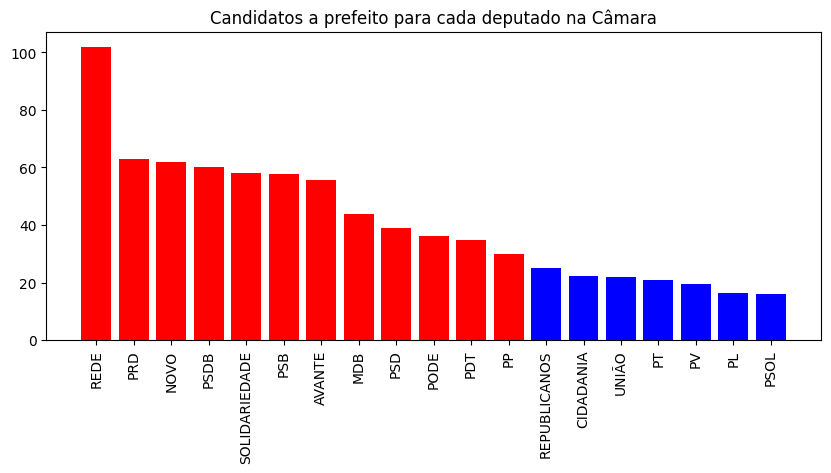

In [95]:
df_cand_por_partido_e_cargo["CAND. PREFEITO POR DEPUTADO"] = df_cand_por_partido_e_cargo["PREFEITO"]/df_cand_por_partido_e_cargo["DEPUTADOS"]
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="CAND. PREFEITO POR DEPUTADO", ascending=False) 
bar_colors = ["blue" if x[1]["CAND. PREFEITO POR DEPUTADO"] <= 30 else "red" for x in df_cand_por_partido_e_cargo.iterrows()]
figure = plt.figure(figsize = (10, 4))
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["CAND. PREFEITO POR DEPUTADO"], color=bar_colors)
plt.xticks(rotation=90)
plt.title("Candidatos a prefeito para cada deputado na Câmara")
plt.show()

In [114]:
df_cand_vereador_por_uf_e_partido = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_UF"]).apply(lambda x : x.groupby("SG_PARTIDO").count().sort_values(by="NM_URNA_CANDIDATO", ascending=False).head(5), include_groups = False)
display(df_cand_vereador_por_uf_e_partido)


NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
AC    PP                          250
      UNIÃO                       232
      REPUBLICANOS                225
      PL                          224
      MDB                         199
...                               ...
TO    REPUBLICANOS               1062
      UNIÃO                       965
      PDT                         675
      PP                          661
      MDB                         529

[130 rows x 1 columns]

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                   
PR    PSD                      3518
      PP                       2986
      PL                       2898
      MDB                      2829
      UNIÃO                    2725
RS    PP                       4143
      MDB                      3918
      PDT                      2932
      PL                       2599
      PT                       2457
SC    MDB                      2761
      PL                       2607
      PP                       2135
      PSD                      2059
      PT                       1418

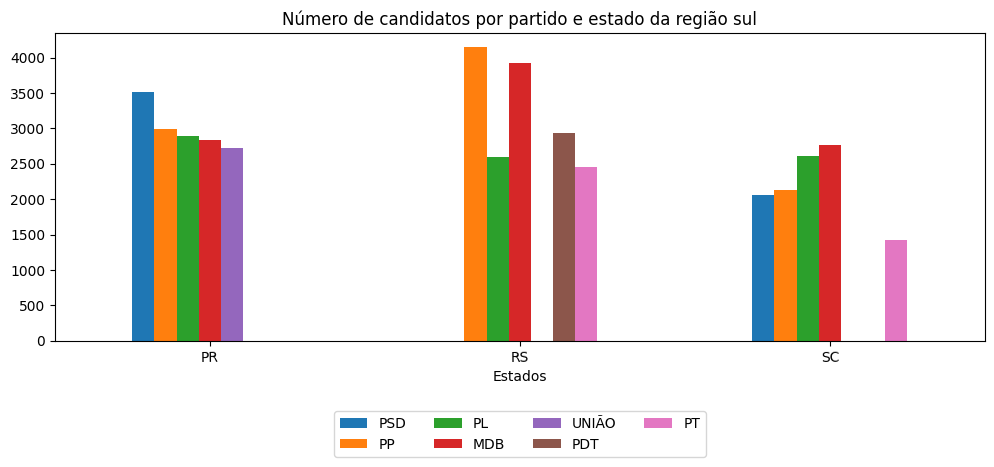

In [202]:
estados_sul = ["RS", "SC", "PR"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_sul)
df_cand_vereador_sul_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_sul_por_uf_e_partido)

df_unstacked = df_cand_vereador_sul_por_uf_e_partido.unstack()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Número de candidatos por partido e estado da região sul")

df_unstacked["NM_URNA_CANDIDATO"].plot(kind="bar", rot=True, ax=ax)
ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4))
ax.set_xlabel("Estados")
plt.show()


NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                      
ES    PSB                          850
      PODE                         848
      PP                           817
      PL                           720
      MDB                          696
MG    PSD                         5806
      MDB                         5337
      PL                          4925
      REPUBLICANOS                4910
      PP                          4758
RJ    PL                          1204
      UNIÃO                       1158
      SOLIDARIEDADE               1136
      REPUBLICANOS                1126
      PP                          1067
SP    PSD                         6498
      REPUBLICANOS                6342
      PL                          6301
      MDB                         5844
      UNIÃO                       5435

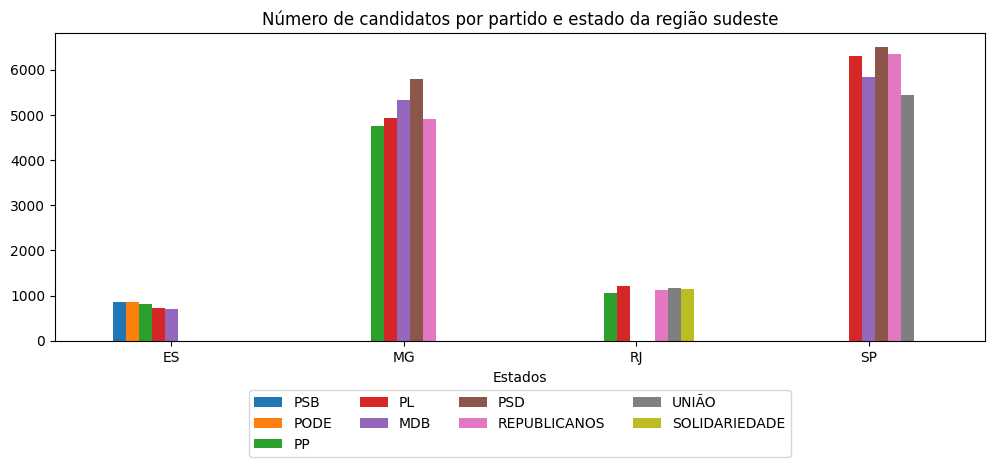

In [196]:
estados_sudeste = ["ES", "MG", "RJ", "SP"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_sudeste)
df_cand_vereador_sudeste_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_sudeste_por_uf_e_partido)

df_unstacked = df_cand_vereador_sudeste_por_uf_e_partido.unstack()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Número de candidatos por partido e estado da região sudeste")

df_unstacked["NM_URNA_CANDIDATO"].plot(kind="bar", rot=True, ax=ax)
ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4))
ax.set_xlabel("Estados")
plt.show()


NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
GO    UNIÃO                      2145
      MDB                        2116
      PP                         1625
      PL                         1593
      PDT                        1084
MS    PSDB                        865
      PP                          790
      PL                          633
      MDB                         621
      REPUBLICANOS                607
MT    UNIÃO                      1334
      PL                         1167
      MDB                        1085
      REPUBLICANOS               1024
      PSB                         940

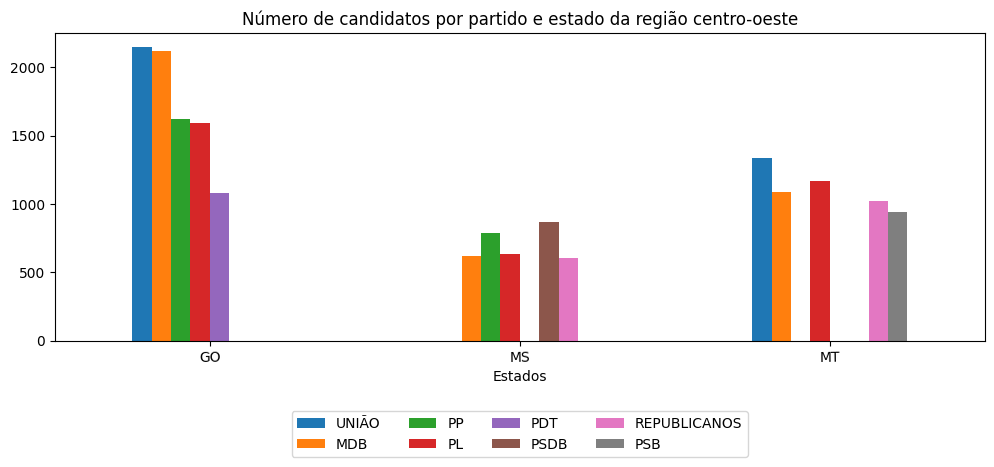

In [191]:
estados_centro_oeste = ["GO", "MT", "MS"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_centro_oeste)
df_cand_vereador_centro_oeste_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_centro_oeste_por_uf_e_partido)

df_unstacked = df_cand_vereador_centro_oeste_por_uf_e_partido.unstack()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Número de candidatos por partido e estado da região centro-oeste")

df_unstacked["NM_URNA_CANDIDATO"].plot(kind="bar", rot=True, ax=ax)
ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4))
ax.set_xlabel("Estados")
plt.show()

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
AL    MDB                         990
      PP                          849
      PSB                         823
      UNIÃO                       410
      PDT                         361
BA    PSD                        3999
      AVANTE                     2820
      PT                         2654
      MDB                        2496
      PP                         2450
CE    PSB                        1563
      PT                         1517
      PSD                        1068
      MDB                         989
      UNIÃO                       880
MA    UNIÃO                      1389
      MDB                        1354
      PSB                        1307
      PP                         1258
      PL                         1222
PB    REPUBLICANOS               1460
      PSB                        1254
      MDB                        1029
      UNIÃO                       786
      PP                          775
PE    PSB                        1472
      REPUBLICANOS               1330
      PP                         1223
      PSD                        1157
      PSDB                       1140
PI    PT                         1668
      MDB                        1531
      PSD                        1430
      PP                          856
      REPUBLICANOS                402
RN    MDB                        1046
      UNIÃO                       832
      PP                          778
      PSDB                        651
      PL                          636
SE    PSD                         756
      UNIÃO                       672
      PP                          529
      PT                          391
      MDB                         341

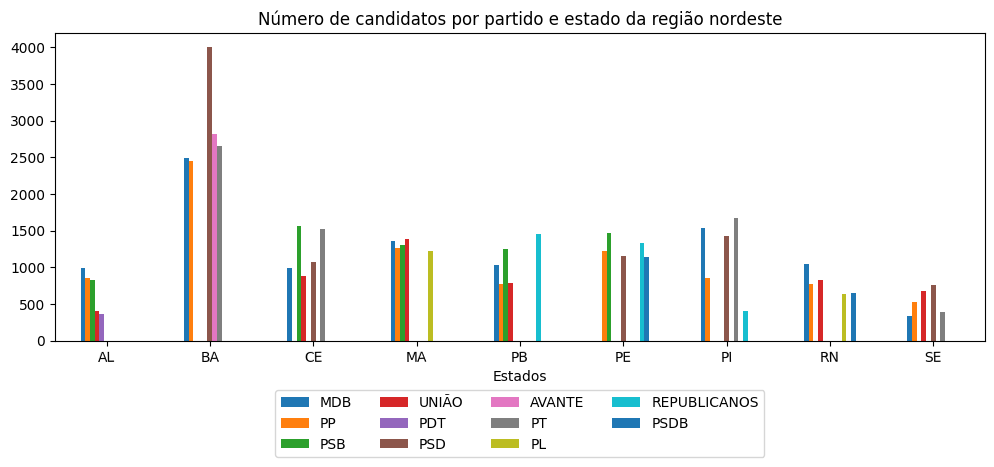

In [192]:
estados_nordeste = ["BA", "SE", "AL", "PB", "PE", "RN", "CE", "MA", "PI"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_nordeste)
df_cand_vereador_nordeste_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_nordeste_por_uf_e_partido)

df_unstacked = df_cand_vereador_nordeste_por_uf_e_partido.unstack()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Número de candidatos por partido e estado da região nordeste")

df_unstacked["NM_URNA_CANDIDATO"].plot(kind="bar", rot=True, ax=ax)
ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4))
ax.set_xlabel("Estados")
plt.show()

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
AC    PP                          250
      UNIÃO                       232
      REPUBLICANOS                225
      PL                          224
      MDB                         199
AM    REPUBLICANOS                738
      UNIÃO                       727
      PSD                         710
      MDB                         700
      PP                          530
AP    PDT                         165
      PL                          159
      UNIÃO                       158
      PSD                         144
      MDB                         124
PA    MDB                        1785
      UNIÃO                      1651
      PSD                        1465
      PP                         1278
      PT                         1202
RO    UNIÃO                       530
      PL                          482
      PSD                         432
      MDB                         420
      PP                          386
RR    REPUBLICANOS                161
      PP                          157
      PDT                         154
      PODE                        117
      PSD                         102
TO    REPUBLICANOS               1062
      UNIÃO                       965
      PDT                         675
      PP                          661
      MDB                         529

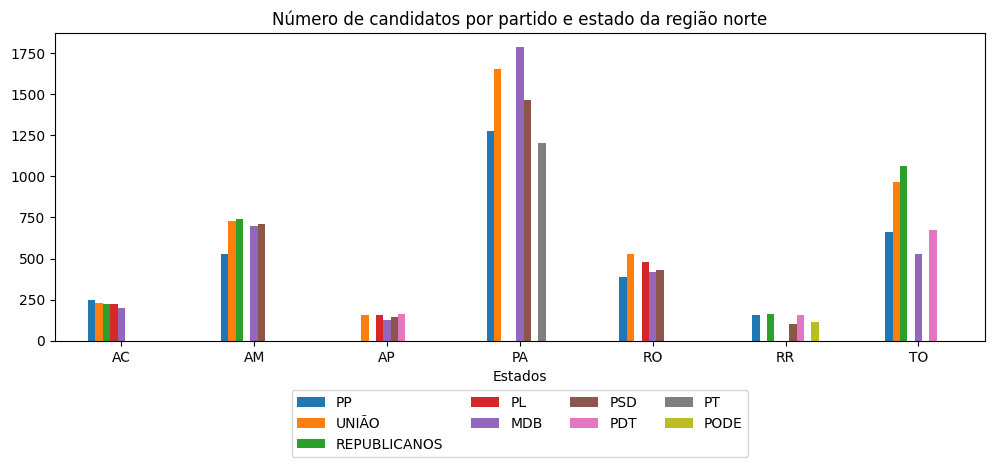

In [193]:
estados_norte = ["TO", "AM", "AP", "RO", "RR", "AC", "PA"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_norte)
df_cand_vereador_norte_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_norte_por_uf_e_partido)

df_unstacked = df_cand_vereador_norte_por_uf_e_partido.unstack()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Número de candidatos por partido e estado da região norte")

df_unstacked["NM_URNA_CANDIDATO"].plot(kind="bar", rot=True, ax=ax)
ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4))
ax.set_xlabel("Estados")
plt.show()